<a href="https://colab.research.google.com/github/shyamjith94/Facebook-sProphetLibrary/blob/main/FaacebookProphet_01.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [18]:
%%capture
!pip install pystan

In [19]:
%%capture
!pip install fbprophet

In [43]:
import pandas as pd
from fbprophet import Prophet

import matplotlib.pyplot as plt


In [21]:
data = pd.read_csv("/content/drive/MyDrive/Facebook-sProphetLibrary/Data/BeerWineLiquor.csv")

In [22]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 324 entries, 0 to 323
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   date    324 non-null    object
 1   beer    324 non-null    int64 
dtypes: int64(1), object(1)
memory usage: 5.2+ KB


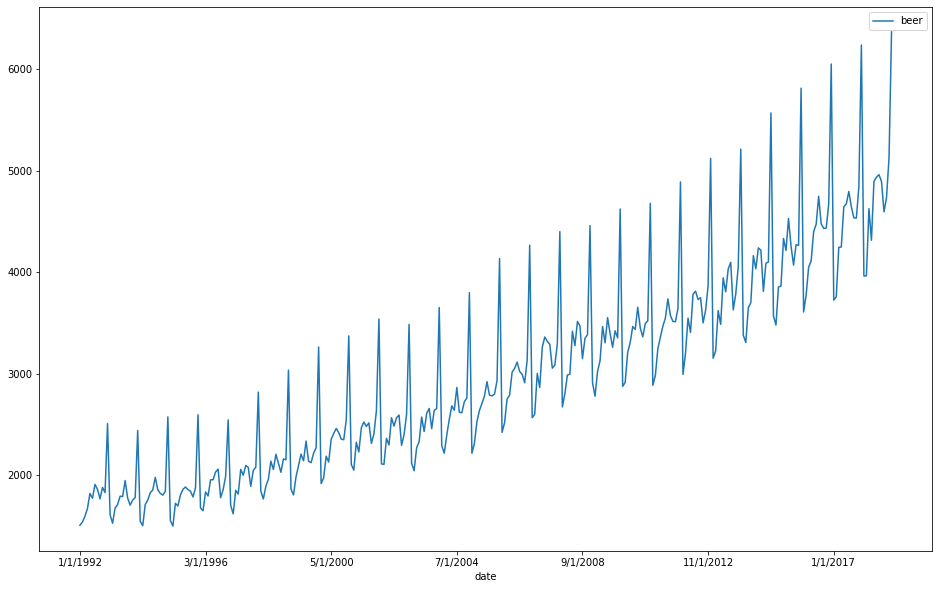

In [23]:
temp = data
temp.index = data['date']
temp.index.frq='MS'
temp.plot(figsize=(16,10))

In [24]:
data.head()

,date,beer
date,,
1/1/1992,1/1/1992,1509
2/1/1992,2/1/1992,1541
3/1/1992,3/1/1992,1597
4/1/1992,4/1/1992,1675
5/1/1992,5/1/1992,1822


In [25]:
# Prophet library expect column sname date as ds and labels are y
data.columns = ['ds', 'y']

In [26]:
data.head()

,ds,y
date,,
1/1/1992,1/1/1992,1509
2/1/1992,2/1/1992,1541
3/1/1992,3/1/1992,1597
4/1/1992,4/1/1992,1675
5/1/1992,5/1/1992,1822


In [27]:
data['ds'] = pd.to_datetime(data['ds'])

In [28]:
m = Prophet()
m.fit(data)

INFO:fbprophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


In [31]:
future = m.make_future_dataframe(periods=24)
future.head()

,ds
0,1992-01-01
1,1992-02-01
2,1992-03-01
3,1992-04-01
4,1992-05-01


In [32]:
future.tail()

,ds
343,2018-12-21
344,2018-12-22
345,2018-12-23
346,2018-12-24
347,2018-12-25


In [34]:
# predict future trained model
forcast = m.predict(future)

In [36]:
forcast.head()

,ds,trend,yhat_lower,yhat_upper,trend_lower,trend_upper,additive_terms,additive_terms_lower,additive_terms_upper,yearly,yearly_lower,yearly_upper,multiplicative_terms,multiplicative_terms_lower,multiplicative_terms_upper,yhat
0,1992-01-01,1774.512619,1149.119140,1481.640126,1774.512619,1774.512619,-461.755050,-461.755050,-461.755050,-461.755050,-461.755050,-461.755050,0.0,0.0,0.0,1312.757569
1,1992-02-01,1777.322689,1190.058997,1513.132909,1777.322689,1777.322689,-427.146658,-427.146658,-427.146658,-427.146658,-427.146658,-427.146658,0.0,0.0,0.0,1350.176031
2,1992-03-01,1779.951464,1439.906607,1757.042133,1779.951464,1779.951464,-178.912314,-178.912314,-178.912314,-178.912314,-178.912314,-178.912314,0.0,0.0,0.0,1601.039150
3,1992-04-01,1782.761533,1432.192918,1739.628830,1782.761533,1782.761533,-196.056786,-196.056786,-196.056786,-196.056786,-196.056786,-196.056786,0.0,0.0,0.0,1586.704747
4,1992-05-01,1785.480956,1667.505404,1990.504616,1785.480956,1785.480956,45.197326,45.197326,45.197326,45.197326,45.197326,45.197326,0.0,0.0,0.0,1830.678281


In [38]:
forcast[['ds', 'yhat_lower', 'yhat_upper', 'yhat']].head()

,ds,yhat_lower,yhat_upper,yhat
0,1992-01-01,1149.119140,1481.640126,1312.757569
1,1992-02-01,1190.058997,1513.132909,1350.176031
2,1992-03-01,1439.906607,1757.042133,1601.039150
3,1992-04-01,1432.192918,1739.628830,1586.704747
4,1992-05-01,1667.505404,1990.504616,1830.678281


In [39]:
forcast[['ds', 'yhat_lower', 'yhat_upper', 'yhat']].tail()

,ds,yhat_lower,yhat_upper,yhat
343,2018-12-21,4430.392372,4760.951423,4591.258252
344,2018-12-22,4387.912780,4715.549782,4548.208136
345,2018-12-23,4341.545681,4676.402394,4510.393978
346,2018-12-24,4312.060648,4630.268483,4478.131991
347,2018-12-25,4282.106600,4602.007823,4451.711001


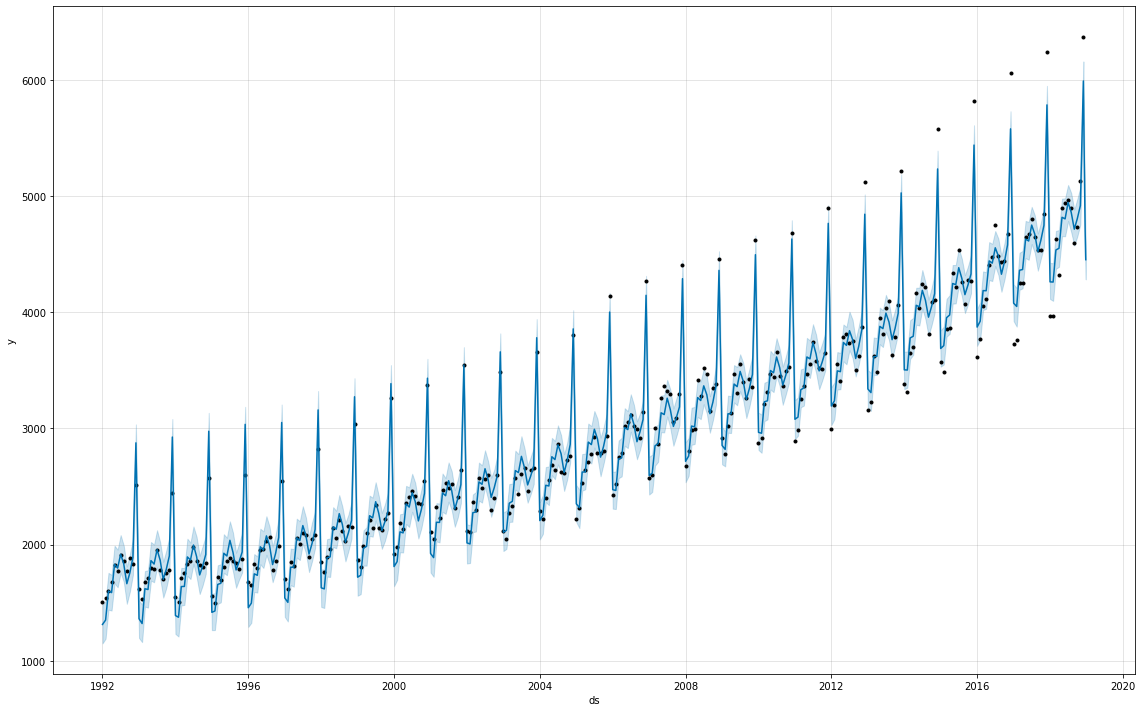

In [42]:
m.plot(forcast, figsize=(16,10));

(735234.0, 737791.0)

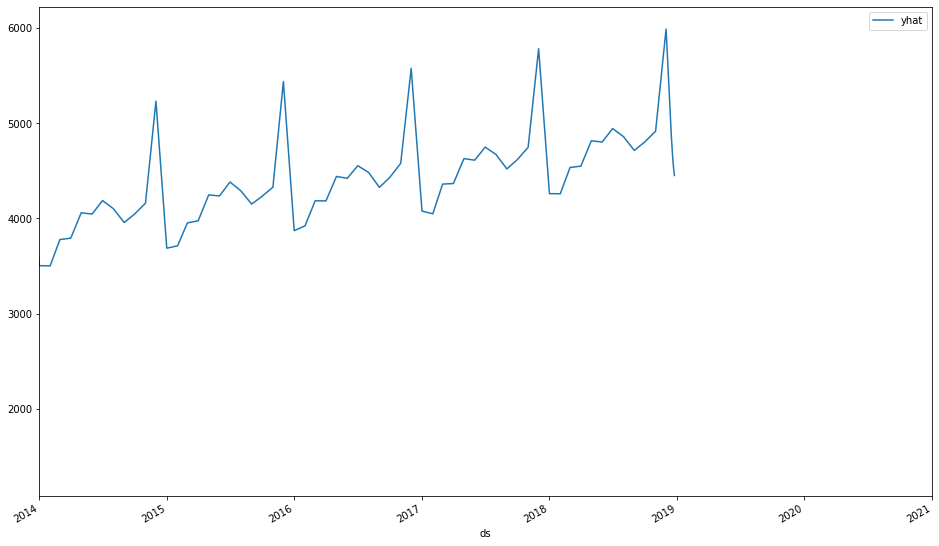

In [63]:
%matplotlib inline
forcast.plot(x='ds', y='yhat', figsize=(16,10));
plt.xlim('2014-01-01', '2021-01-01')

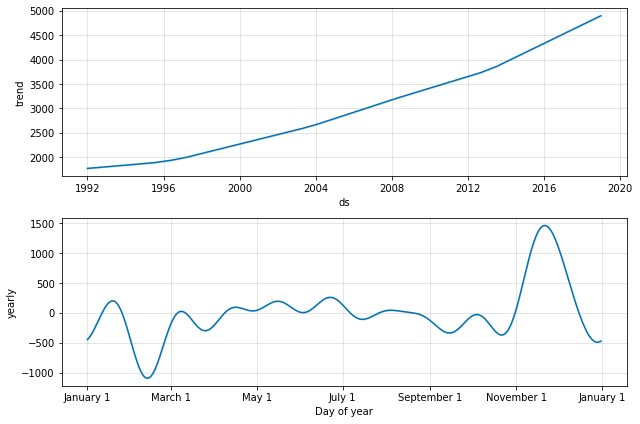

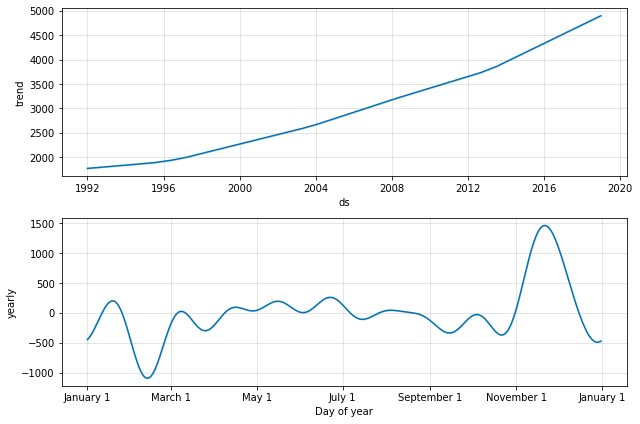

In [65]:
m.plot_components(forcast)